# 1. Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm # import colormap module for legend coloring
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Reading the Datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

df_dev_cty = pd.read_csv('/content/drive/MyDrive/Dataset/life_expectancy_developing_country.csv')
df_dev_vacc = pd.read_csv('/content/drive/MyDrive/Dataset/immunization_developing_country.csv')


Mounted at /content/drive


In [4]:
df_dev_cty.head()

,country,country_code,indicator_name,indicator_code,year,life_expectancy
0,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.118
1,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,41.854
2,Argentina,ARG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,71.615
3,Burundi,BDI,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,45.184
4,Benin,BEN,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1990,53.020


In [5]:
df_dev_cty.country.unique()

array(['Afghanistan', 'Angola', 'Argentina', 'Burundi', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Belize', 'Brazil', 'Bhutan',
       'Botswana', 'Central African Republic', 'China', 'Cameroon',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Djibouti', 'Dominican Republic', 'Algeria', 'Ecuador', 'Eritrea',
       'Ethiopia', 'Fiji', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Equatorial Guinea', 'Guatemala', 'Guyana', 'Honduras', 'Haiti',
       'Indonesia', 'India', 'Iraq', 'Jamaica', 'Jordan', 'Kenya',
       'Cambodia', 'Kiribati', 'Lebanon', 'Liberia', 'Libya', 'Sri Lanka',
       'Lesotho', 'Morocco', 'Madagascar', 'Maldives', 'Mexico', 'Mali',
       'Myanmar', 'Mongolia', 'Mozambique', 'Mauritania', 'Mauritius',
       'Malawi', 'Malaysia', 'Namibia', 'Niger', 'Nigeria', 'Nicaragua',
       'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Papua New Guinea',
       'Paraguay', 'Rwanda', 'Sudan', 'Senegal', 'Solomon Islands',
       'Sierra Leo

In [6]:
df_dev_vacc.head()

,unicef_region,iso3,country,vaccine,year,coverage
0,ROSA,AFG,Afghanistan,BCG,2024,68.0
1,MENA,DZA,Algeria,BCG,2024,98.0
2,ESAR,AGO,Angola,BCG,2024,68.0
3,LACR,ARG,Argentina,BCG,2024,81.0
4,ROSA,BGD,Bangladesh,BCG,2024,99.0


In [7]:
df_dev_vacc.country.unique()

array(['Afghanistan', 'Algeria', 'Angola', 'Argentina', 'Bangladesh',
       'Belize', 'Benin', 'Bhutan', 'Bolivia (Plurinational State Of)',
       'Botswana', 'Brazil', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Central African Republic', 'Chad',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Cuba',
       'Democratic Republic Of The Congo', 'Djibouti',
       'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Eswatini', 'Ethiopia', 'Fiji',
       'Gabon', 'Gambia', 'Ghana', 'Guatemala', 'Guinea', 'Guinea-Bissau',
       'Guyana', 'Haiti', 'Honduras', 'India', 'Indonesia',
       'Iran (Islamic Republic Of)', 'Iraq', 'Jamaica', 'Jordan', 'Kenya',
       'Kiribati', 'Lesotho', 'Liberia', 'Libya', 'Madagascar', 'Malawi',
       'Malaysia', 'Maldives', 'Mali', 'Mauritania', 'Mauritius',
       'Mexico', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar',
       'Namibia', 'Nepal', 'Niger', 'Nigeria', 'Pakista

# 3. Joining the Country & Vaccine Dataset

In [8]:
df_dev_vacc = df_dev_vacc.rename(columns={'iso3': 'country_code'})
df_dev_cty = df_dev_cty.drop(columns=['indicator_name', 'indicator_code'])
df_dev_vacc = df_dev_vacc.drop(columns=['unicef_region'])

df_merged = pd.merge(
    df_dev_cty,
    df_dev_vacc,
    on=['country_code', 'country', 'year'],
    how='inner'
)
display(df_merged.head())

,country,country_code,year,life_expectancy,vaccine,coverage
0,Afghanistan,AFG,2000,55.005,BCG,30.0
1,Afghanistan,AFG,2000,55.005,DTP1,48.0
2,Afghanistan,AFG,2000,55.005,DTP3,24.0
3,Afghanistan,AFG,2000,55.005,HEPB3,NaN
4,Afghanistan,AFG,2000,55.005,HEPBB,NaN


In [9]:
array_merged = df_merged.country.unique()

In [10]:
array_ori = np.array(['Afghanistan', 'Angola', 'Argentina', 'Burundi', 'Benin',
       'Burkina Faso', 'Bangladesh', 'Belize', 'Brazil', 'Bhutan',
       'Botswana', 'Central African Republic', 'China', 'Cameroon',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Djibouti', 'Dominican Republic', 'Algeria', 'Ecuador', 'Eritrea',
       'Ethiopia', 'Fiji', 'Gabon', 'Ghana', 'Guinea', 'Guinea-Bissau',
       'Equatorial Guinea', 'Guatemala', 'Guyana', 'Honduras', 'Haiti',
       'Indonesia', 'India', 'Iraq', 'Jamaica', 'Jordan', 'Kenya',
       'Cambodia', 'Kiribati', 'Lebanon', 'Liberia', 'Libya', 'Sri Lanka',
       'Lesotho', 'Morocco', 'Madagascar', 'Maldives', 'Mexico', 'Mali',
       'Myanmar', 'Mongolia', 'Mozambique', 'Mauritania', 'Mauritius',
       'Malawi', 'Malaysia', 'Namibia', 'Niger', 'Nigeria', 'Nicaragua',
       'Nepal', 'Pakistan', 'Peru', 'Philippines', 'Papua New Guinea',
       'Paraguay', 'Rwanda', 'Sudan', 'Senegal', 'Solomon Islands',
       'Sierra Leone', 'El Salvador', 'South Sudan',
       'Sao Tome And Principe', 'Suriname', 'Eswatini',
       'Syrian Arab Republic', 'Chad', 'Togo', 'Thailand', 'Timor-Leste',
       'Trinidad And Tobago', 'Tunisia', 'Tuvalu', 'Uganda', 'Uruguay',
       'Viet Nam', 'Vanuatu', 'Samoa', 'South Africa', 'Zambia',
       'Zimbabwe'], dtype=object)

In [11]:
set_ori = set(array_ori)
set_merged = set(array_merged)

missing_countries = list(set_ori - set_merged)

print(f"Countries in array_ori but not in array_merged: {missing_countries}")

Countries in array_ori but not in array_merged: ['Nicaragua']


# 4. EDA on the Joined Dataset

In [12]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29520 entries, 0 to 29519
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          29520 non-null  object 
 1   country_code     29520 non-null  object 
 2   year             29520 non-null  int64  
 3   life_expectancy  29520 non-null  float64
 4   vaccine          29520 non-null  object 
 5   coverage         21025 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.4+ MB


In [13]:
df_merged.describe(include='all')

,country,country_code,year,life_expectancy,vaccine,coverage
count,29520,29520,29520.000000,29520.000000,29520,21025.000000
unique,95,95,NaN,NaN,16,NaN
top,Burkina Faso,BFA,NaN,NaN,DTP1,NaN
freq,384,384,NaN,NaN,2280,NaN
mean,NaN,NaN,2011.500000,65.359392,NaN,81.492889
std,NaN,NaN,6.922304,8.152225,NaN,18.263026
min,NaN,NaN,2000.000000,14.665000,NaN,0.000000
25%,NaN,NaN,2005.750000,59.975000,NaN,74.000000
50%,NaN,NaN,2011.500000,66.048000,NaN,87.000000
75%,NaN,NaN,2017.250000,71.805000,NaN,95.000000


In [14]:
df_merged.isna().sum()

,0
country,0
country_code,0
year,0
life_expectancy,0
vaccine,0
coverage,8495


In [15]:
# pivot the data into a wide table
df_wide = df_merged.pivot_table(
    index=['country','country_code', 'year'],
    columns='vaccine',
    values='coverage'
).reset_index()


In [16]:
df_wide.head()

vaccine,country,country_code,year,BCG,DTP1,DTP3,HEPB3,HEPBB,HIB3,IPV1,IPV2,MCV1,MCV2,MENGA,PCV3,POL3,RCV1,ROTAC,YFV
0,Afghanistan,AFG,2000,30.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN
1,Afghanistan,AFG,2001,43.0,59.0,33.0,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN
2,Afghanistan,AFG,2002,46.0,62.0,36.0,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,36.0,NaN,NaN,NaN
3,Afghanistan,AFG,2003,44.0,66.0,41.0,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,41.0,NaN,NaN,NaN
4,Afghanistan,AFG,2004,51.0,72.0,50.0,NaN,NaN,NaN,NaN,NaN,48.0,2.0,NaN,NaN,50.0,NaN,NaN,NaN


In [17]:
df_wide = df_wide.merge(
    df_merged[['country', 'year', 'life_expectancy']].drop_duplicates(),
    on=['country', 'year'],
    how='left'
)

In [18]:
df_wide.head()

,country,country_code,year,BCG,DTP1,DTP3,HEPB3,HEPBB,HIB3,IPV1,IPV2,MCV1,MCV2,MENGA,PCV3,POL3,RCV1,ROTAC,YFV,life_expectancy
0,Afghanistan,AFG,2000,30.0,48.0,24.0,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,NaN,24.0,NaN,NaN,NaN,55.005
1,Afghanistan,AFG,2001,43.0,59.0,33.0,NaN,NaN,NaN,NaN,NaN,37.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,55.511
2,Afghanistan,AFG,2002,46.0,62.0,36.0,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,36.0,NaN,NaN,NaN,56.225
3,Afghanistan,AFG,2003,44.0,66.0,41.0,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,41.0,NaN,NaN,NaN,57.171
4,Afghanistan,AFG,2004,51.0,72.0,50.0,NaN,NaN,NaN,NaN,NaN,48.0,2.0,NaN,NaN,50.0,NaN,NaN,NaN,57.810


In [19]:
df_wide.to_csv('df_wide.csv', index=False)

In [20]:
get_vacc_col_lst = df_wide.columns[range(3,19)].tolist()

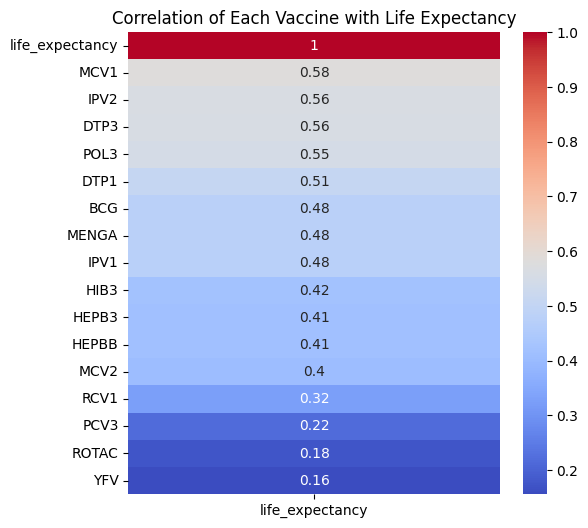

In [21]:
# Correlation between life expectancy and each vaccine
# 0 and 0.3 = weak strength
# 0.4 and 0.6 = moderate strength
# >0.7 = strong strength
df_wide_corr = df_wide[get_vacc_col_lst + ['life_expectancy']]
corr = df_wide_corr.corr(numeric_only=True)

plt.figure(figsize=(6,6))
sns.heatmap(corr[['life_expectancy']].sort_values(by='life_expectancy', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation of Each Vaccine with Life Expectancy")
plt.show()

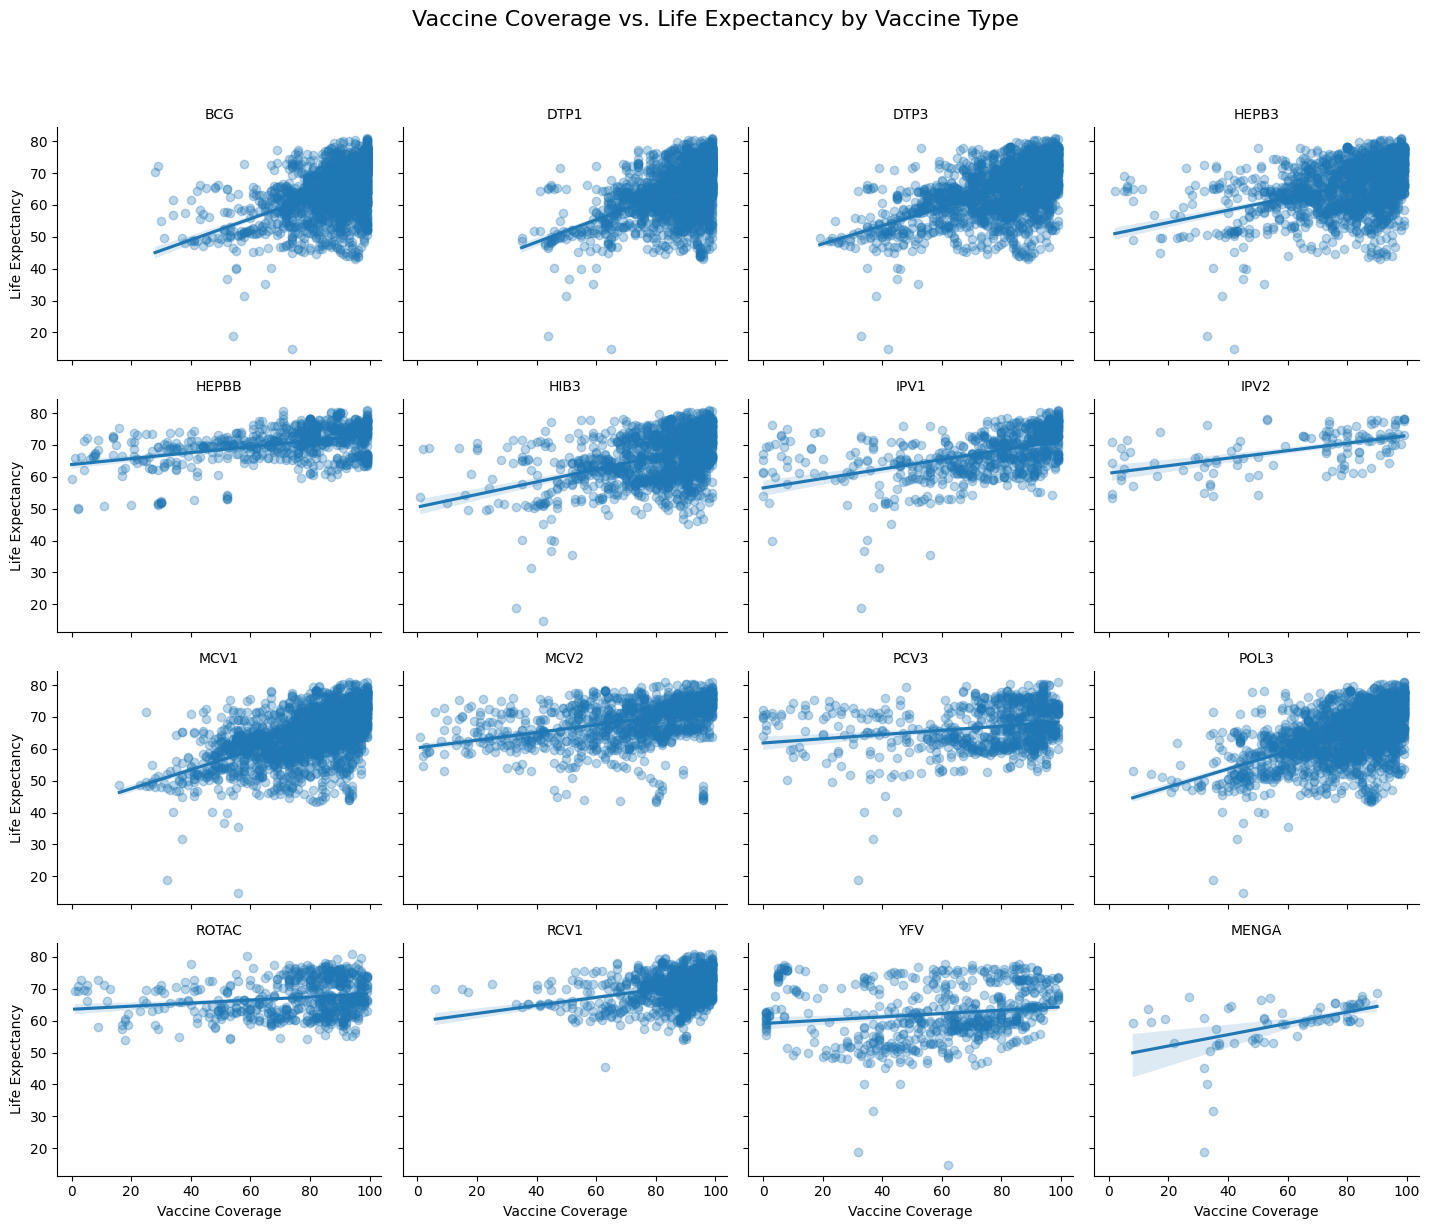

In [22]:
# Scatter plot with regression
# Melt the dataframe to long format for faceting
df_long = df_wide.melt(
    id_vars=['country', 'country_code', 'year', 'life_expectancy'],
    value_vars=get_vacc_col_lst,
    var_name='vaccine',
    value_name='coverage'
)


# Create a FacetGrid
# g = sns.FacetGrid(df_long, col='vaccine', col_wrap=4, height=3, aspect=1.2)
g = sns.FacetGrid(df_merged, col='vaccine', col_wrap=4, height=3, aspect=1.2)
g.map(sns.regplot, 'coverage', 'life_expectancy', scatter_kws={'alpha':0.3})
g.set_axis_labels('Vaccine Coverage', 'Life Expectancy')
# g.set_titles(template='{col_name} Coverage')
g.set_titles(template='{col_name}')
plt.suptitle('Vaccine Coverage vs. Life Expectancy by Vaccine Type', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

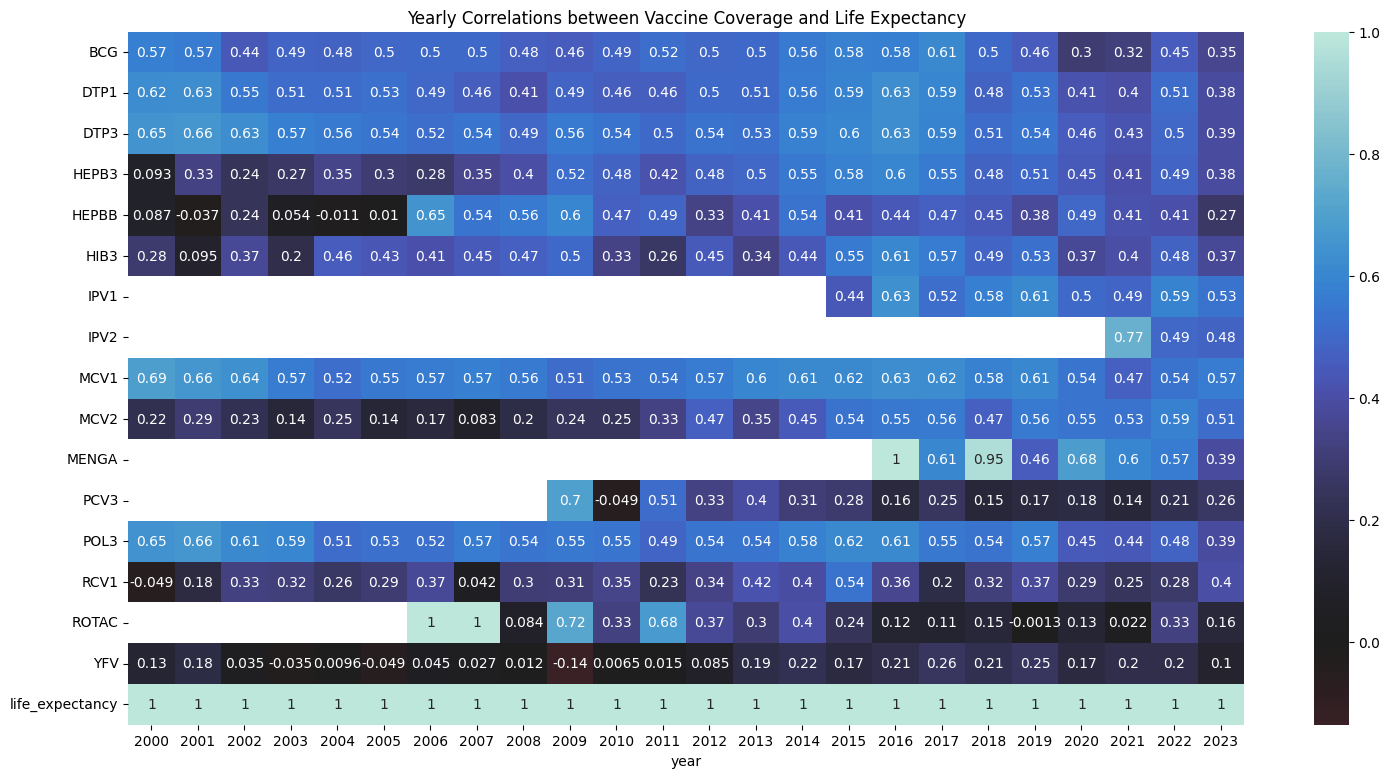

In [23]:
# Rolling trend (2000–2023) correlations
corr_year = (
    df_wide.groupby("year")[get_vacc_col_lst + ["life_expectancy"]]
    .corr()["life_expectancy"]
    .unstack()
)

plt.figure(figsize=(18,9))
# sns.heatmap(corr_year.T, cmap="magma_r", center=0, annot=True)
sns.heatmap(corr_year.T, cmap="icefire_r", center=0, annot=True)
plt.title("Yearly Correlations between Vaccine Coverage and Life Expectancy")
plt.show()


In [24]:
# country avg on mean for all vaccines and total vaccines
country_avg = df_wide.groupby("country")[get_vacc_col_lst + ["life_expectancy"]].mean()
country_avg["vaccine_mean"] = country_avg[get_vacc_col_lst].mean(axis=1)


In [25]:
country_avg.head()

,BCG,DTP1,DTP3,HEPB3,HEPBB,HIB3,IPV1,IPV2,MCV1,MCV2,MENGA,PCV3,POL3,RCV1,ROTAC,YFV,life_expectancy,vaccine_mean
country,,,,,,,,,,,,,,,,,,
Afghanistan,64.583333,70.458333,57.416667,63.411765,32.10,63.400000,60.875000,39.333333,54.041667,30.850000,NaN,58.800000,57.500000,NaN,51.000000,NaN,60.491583,54.136161
Algeria,98.583333,95.916667,90.208333,89.300000,98.55,90.812500,82.666667,33.000000,87.666667,89.333333,NaN,81.500000,89.958333,83.571429,NaN,NaN,73.975125,85.466712
Angola,66.583333,66.083333,51.583333,54.941176,NaN,54.941176,54.833333,24.000000,56.250000,29.000000,NaN,52.272727,42.916667,55.000000,47.400000,42.666667,57.220583,49.890839
Argentina,93.250000,92.833333,88.833333,86.409091,78.30,88.750000,82.000000,NaN,91.750000,83.958333,NaN,77.500000,88.458333,91.750000,75.444444,7.800000,75.559292,80.502633
Bangladesh,97.791667,97.708333,94.375000,85.285714,NaN,96.266667,76.111111,NaN,89.708333,87.083333,NaN,92.333333,94.250000,89.416667,NaN,NaN,68.529042,90.939105


In [26]:
# get top10 and bottom 10 country for mean life_expectancy
top_10_cty = country_avg.nlargest(10, "life_expectancy")
bottom_10_cty = country_avg.nsmallest(10, "life_expectancy")

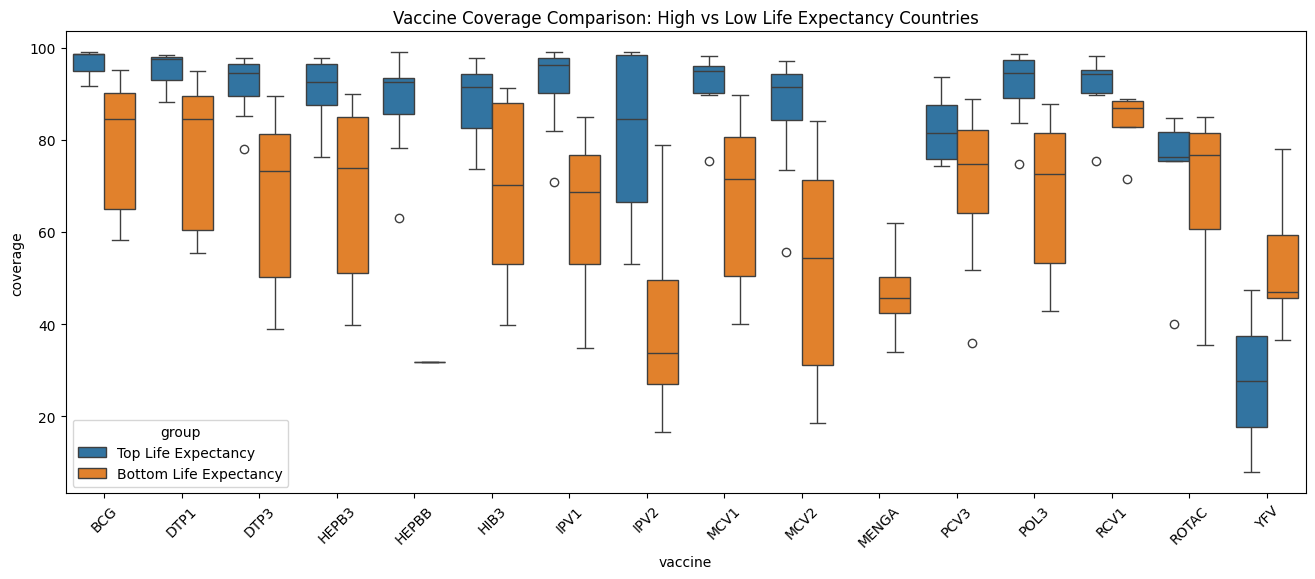

In [27]:
# Which vaccines differentiate countries with high vs low life expectancy
compare = pd.concat([
    top_10_cty.assign(group="Top Life Expectancy"),
    bottom_10_cty.assign(group="Bottom Life Expectancy")
])

cty_comp_long = compare.reset_index().melt(
    id_vars=["country","group"],
    value_vars=get_vacc_col_lst,
    var_name="vaccine",
    value_name="coverage"
)

plt.figure(figsize=(16,6))
sns.boxplot(data=cty_comp_long, x="vaccine", y="coverage", hue="group")
plt.xticks(rotation=45)
plt.title("Vaccine Coverage Comparison: High vs Low Life Expectancy Countries")
plt.show()

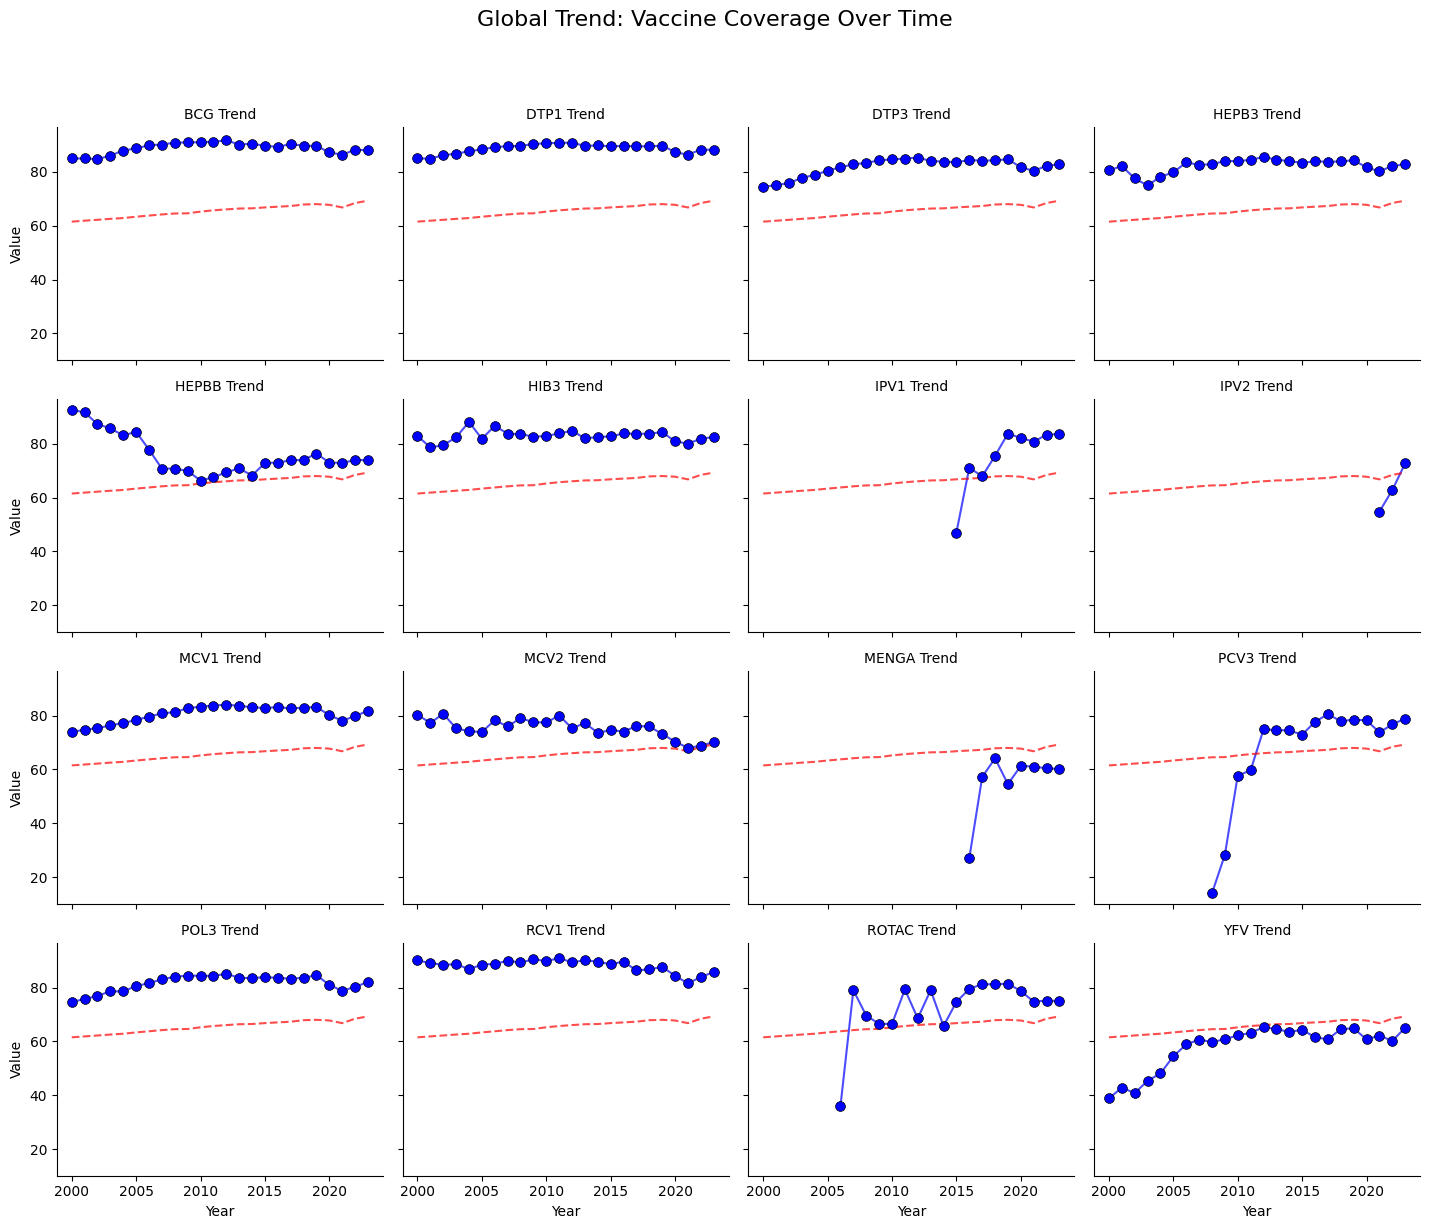

In [28]:
#Get the trend dataset for each year in mean vaccine coverage vs mean life expectancy
trend = df_wide.groupby("year")[get_vacc_col_lst + ["life_expectancy"]].mean()


# Melt the trend dataframe to long format for faceting
df_trend_melted_vaccines = trend.reset_index().melt(
    id_vars=['year', 'life_expectancy'],
    var_name='vaccine',
    value_name='coverage'
)

# Calculate global min/max life expectancy for consistent color mapping across facets
global_min_le = df_trend_melted_vaccines['life_expectancy'].min()
global_max_le = df_trend_melted_vaccines['life_expectancy'].max()

# Create a FacetGrid
g = sns.FacetGrid(df_trend_melted_vaccines, col='vaccine', col_wrap=4, height=3, aspect=1.2)

# Define a custom plotting function for each facet
def plot_facet_trends_with_hue_legend(data, **kwargs):
    ax = plt.gca()

    # Plot vaccine coverage points as normal points
    sns.scatterplot(data=data, x='year', y='coverage', color='blue', ax=ax, s=50, edgecolors='black', linewidth=0.5, legend=False)

    # Plot the vaccine coverage line
    sns.lineplot(data=data, x='year', y='coverage', ax=ax, color='blue', alpha=0.7, legend=False, zorder=0)

    # Plot the overall life expectancy trend line for reference
    sns.lineplot(data=data, x='year', y='life_expectancy', ax=ax, color='red', linestyle='--', alpha=0.7, label='Life Expectancy Trend', legend=False, zorder=0)

# Apply the custom plotting function to each facet
g.map_dataframe(plot_facet_trends_with_hue_legend, global_min_le=global_min_le, global_max_le=global_max_le)

g.set_axis_labels('Year', 'Value')
g.set_titles(template='{col_name} Trend')
plt.suptitle('Global Trend: Vaccine Coverage Over Time', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

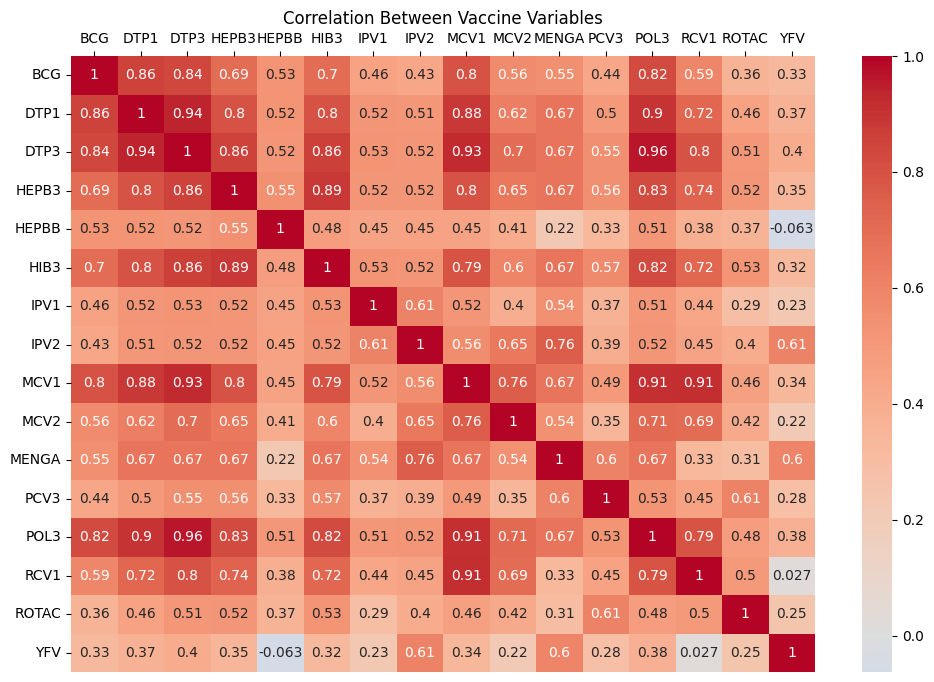

In [29]:
# check for vaccine multicollinearity, values > 0.8 shows high multicollinearity
plt.figure(figsize=(12,8))

ax = sns.heatmap(df_wide[get_vacc_col_lst].corr(), cmap="coolwarm", center=0, annot=True)
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()
plt.title("Correlation Between Vaccine Variables")
plt.show()

In [30]:
# PCA
# To see how vaccines cluster together and relate to life expectancy. Only on vaccine columns
X = df_wide[get_vacc_col_lst]
X = X.fillna(0.0)
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)

df_wide["PC1"] = coords[:,0]
df_wide["PC2"] = coords[:,1]


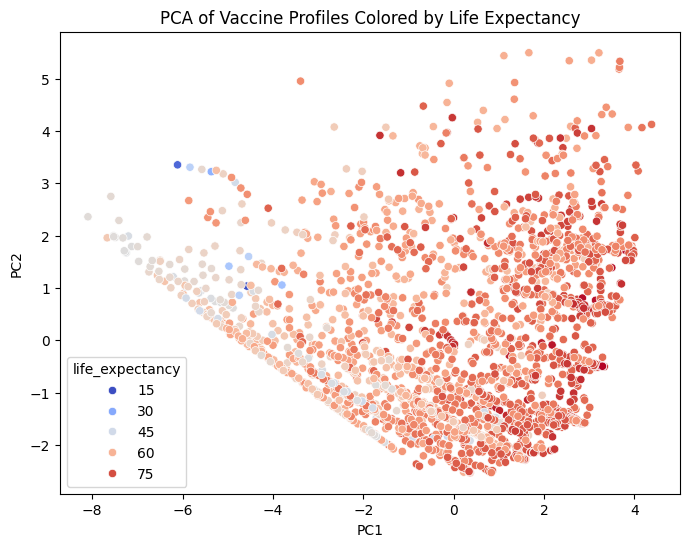

In [31]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_wide, x="PC1", y="PC2", hue="life_expectancy", palette="coolwarm")
plt.title("PCA of Vaccine Profiles Colored by Life Expectancy")
plt.show()

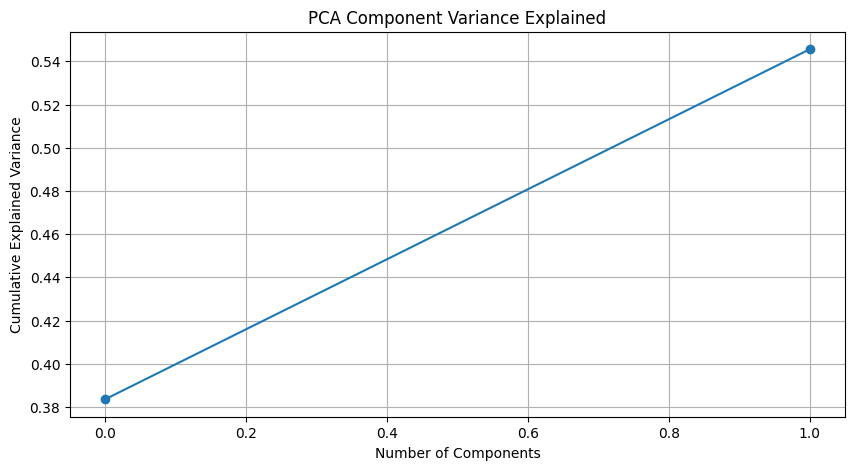

In [32]:
# Variance explained plot
# If the first 2–3 components explain >70%, PCA is effective
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Component Variance Explained")
plt.grid(True)
plt.show()